In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self):
        
        print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.weights = None

    def fit(self, X, y, lr, epochs, batch_size=1):
        
        self.X = X
        self.y = y
        
        self.rows, self.cols = X.shape
        
        # Initialize weight and bias
        self.w = np.zeros(self.cols)
        self.b = 0
        
        for epoch in range(epochs):

            for batch in range(len(X)//batch_size):
                                
                y_pred = self.predict(X)
                
                # Implementing the gradient descent
                # compute the gradients of weight & bias
                dw = (1 / self.rows) * np.dot(X.T, y_pred - y)
                db = (1 / self.rows) * np.sum(y_pred - y)
                
                # update parameters
                self.w = self.w - lr * dw
                self.b = self.b - lr * db
            
            self.epoch.append(epoch)
            self.train_loss.append(self.get_loss(X, y))
            
        self.weights = self.w, self.b

    def get_loss(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y_pred - y) ** 2)
        return mse

    def predict(self, X):
        return np.dot(X, self.w) + self.b
                
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse_loss = np.mean((y_pred - y) ** 2)
        return mse_loss
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        
        plt.plot(self.epoch, self.train_loss, color = 'blue', linewidth = '1')
        
        plt.xlabel('epoch')
        plt.ylabel('MSE')
        plt.title('MSE Loss')
        plt.show()

# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
age         938 non-null int64
sex         938 non-null object
bmi         938 non-null float64
children    938 non-null int64
smoker      938 non-null object
region      938 non-null object
charges     938 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####
# sex.female -> 0
# sex.male -> 1

# smoker.no -> 0
# smoker.yes -> 1

# region.northeast -> 0
# region.northwest -> 1
# region.southeast -> 2
# region.southwest -> 3
##################################################################


# You may try different label encoding for training your own model

df_train.sex.replace(('female', 'male'),(0, 1), inplace=True)
df_train.smoker.replace(('no', 'yes'),(0, 1), inplace=True)
df_train.region.replace(('northeast', 'northwest', 'southeast', 'southwest'),(0, 1, 2, 3), inplace=True)

df_val.sex.replace(('female', 'male'),(0, 1), inplace=True)
df_val.smoker.replace(('no', 'yes'),(0, 1), inplace=True)
df_val.region.replace(('northeast', 'northwest', 'southeast', 'southwest'),(0, 1, 2, 3), inplace=True)

df_test.sex.replace(('female', 'male'),(0, 1), inplace=True)
df_test.smoker.replace(('no', 'yes'),(0, 1), inplace=True)
df_test.region.replace(('northeast', 'northwest', 'southeast', 'southwest'),(0, 1, 2, 3), inplace=True)

# Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [10]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9

lr = 0.002
epochs = 150000 

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  1382.5127744340296
Weights:  (array([380.13540589]),)


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48344946


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920281.01434046


In [14]:
test_pred = linear_reg.predict(x_test)

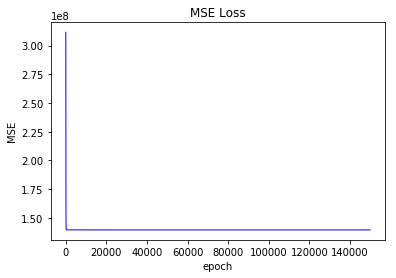

In [15]:
linear_reg.plot_curve()

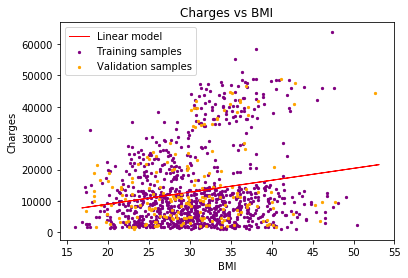

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO

plt.scatter(x_train, y_train, s=5, c='purple', label="Training samples")
plt.scatter(x_val, y_val, s=5, c='orange', label="Validation samples")
plt.plot(x_test, test_pred, color="red", linewidth=1, label="Linear model")

plt.xlabel('BMI')
plt.ylabel('Charges')

plt.title('Charges vs BMI')
plt.legend()
plt.show()

# Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# TODO
# You may convert data to NumPy here 
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

In [19]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 0.0007
epochs = 650000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -11857.028298598665
Weights:  (array([  259.85072835,  -383.5471172 ,   333.3318584 ,   442.55699937,
       24032.21979141,  -416.01494403]),)


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25354349


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958563.652706645


In [23]:
test_pred = linear_reg.predict(x_test)

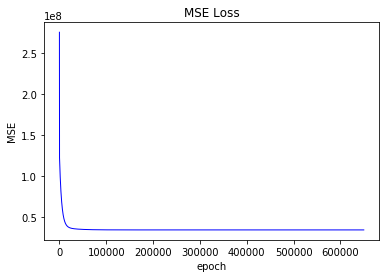

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [25]:
matrix = df_train.corr()

print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.053253  0.105642  0.033802 -0.004509 -0.006884  0.324213
sex      -0.053253  1.000000  0.015213  0.023992  0.068751 -0.002937  0.025908
bmi       0.105642  0.015213  1.000000  0.025009 -0.005701  0.141745  0.189973
children  0.033802  0.023992  0.025009  1.000000 -0.012050  0.000552  0.048509
smoker   -0.004509  0.068751 -0.005701 -0.012050  1.000000 -0.012810  0.789616
region   -0.006884 -0.002937  0.141745  0.000552 -0.012810  1.000000 -0.026971
charges   0.324213  0.025908  0.189973  0.048509  0.789616 -0.026971  1.000000


In [26]:
x_train = df_train.drop(['charges', 'region', 'sex'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges', 'region', 'sex'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges', 'region', 'sex'], axis=1)

In [27]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

x_test = x_test.to_numpy()

Standardization

In [28]:
x_train_std = (x_train - np.average(x_train)) / (np.std(x_train))
x_val_std = (x_val - np.average(x_val)) / (np.std(x_val))
x_test_std = (x_test - np.average(x_test)) / (np.std(x_test))

Normalization

In [29]:
x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_val_norm = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))
x_test_norm = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

In [30]:
print(x_train.shape)

(938, 4)


In [38]:
batch_size = 4

lr = 0.8
epochs = 4000

linear_reg = LinearRegression()
linear_reg.fit(x_train_norm, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

Don't cheat.


In [39]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -12373.975397120324
Weights:  (array([  16724.54209958,   20582.63215799,   28115.03228944,
       1536833.45226046]),)


In [40]:
print('training loss: ', linear_reg.evaluate(x_train_norm, y_train)) 

training loss:  34941489.1228193


In [41]:
print('validation loss: ', linear_reg.evaluate(x_val_norm, y_val)) 

validation loss:  42300235.90100111


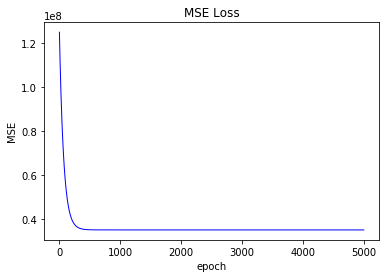

In [42]:
linear_reg.plot_curve()

Evaluate model for testing data

In [43]:
test_pred = linear_reg.predict(x_test_norm)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, )

test_pred shape:  (200,)


# Output the csv file

In [44]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("311553009_prediction.csv")